<h1> Data Analytics Project</h1>



<h2> United Kingdom Road Accident Data Analysis</h2>
<h3> Inclusive Years :2019-2022</h3>

<h2> Importing Libraries</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway


import warnings
warnings.filterwarnings('ignore')

In [2]:
accident = pd.read_csv('dataset\\accident_data.csv')

In [3]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [4]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05/06/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02/07/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26/08/2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16/08/2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03/09/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18/02/2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21/02/2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23/02/2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23/02/2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [5]:
accident.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


In [6]:
accident.isnull()

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,False,False,False,False,False,False,False,False,False,False,False,False,False,False
660675,False,False,False,False,False,False,False,False,False,False,False,False,False,False
660676,False,False,False,False,False,False,False,False,False,False,False,False,False,False
660677,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<h2>Checking NUll Values </h2>

In [7]:
accident.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,660654.0,52.553866,1.406922,49.914430,51.490690,52.315641,53.453452,60.757544
Longitude,660653.0,-1.431210,1.383330,-7.516225,-2.332291,-1.411667,-0.232869,1.762010
Number_of_Casualties,660679.0,1.357040,0.824847,1.000000,1.000000,1.000000,1.000000,68.000000
Number_of_Vehicles,660679.0,1.831255,0.715269,1.000000,1.000000,2.000000,2.000000,32.000000


In [8]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [9]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mode()[0])

In [10]:
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mode()[0])
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna('unaccounted')
accident['Road_Type'] = accident['Road_Type'].fillna('unaccounted')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna('unaccounted')

In [11]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<H2> Converting Object Data type to Date Time Data Type</h2>

In [12]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True, errors = 'coerce')

In [13]:
accident['Year'] = accident['Accident Date'].dt.year
accident['Month'] = accident['Accident Date'].dt.month
accident['Day'] = accident['Accident Date'].dt.day
accident['DayOfWeek'] = accident['Accident Date'].dt.dayofweek

In [14]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Year                       0
Month                      0
Day                        0
DayOfWeek                  0
dtype: int64

In [15]:
# accident['Accident Date'] = accident['Accident Date'].str.strip()
# accident['Accident Date'] = accident['Accident Date'].str.replace('/','-')

<h3> Changing the Day and month into a proper value</h3>

In [16]:
daily_accident = accident['DayOfWeek'].value_counts().sort_index()

day_map = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

daily_accident.index = daily_accident.index.map(day_map)

In [17]:
monthly_accident = accident['Month'].value_counts().sort_index()

month_map = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

monthly_accident.index = monthly_accident.index.map(month_map)

<h2> Changing Data types into valid Data Types</h2>

In [18]:
accident['Accident_Severity'] = accident['Accident_Severity'].astype('category')
accident['Latitude'] = accident['Latitude'].astype('category')
accident['Light_Conditions'] = accident['Light_Conditions'].astype('category')
accident['District Area'] = accident['District Area'].astype('category')
accident['Longitude'] = accident['Longitude'].astype('category')
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].astype('category')
accident['Road_Type'] = accident['Road_Type'].astype('category')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].astype('category')
accident['Weather_Conditions'] = accident['Weather_Conditions'].astype('category')
accident['Vehicle_Type'] = accident['Vehicle_Type'].astype('category')

accident['Year'] = accident['Year'].astype('category')
accident['Month'] = accident['Month'].astype('category')
accident['Day'] = accident['Day'].astype('category')
accident['DayOfWeek'] = accident['DayOfWeek'].astype('category')

In [19]:
accident.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                         category
Light_Conditions                 category
District Area                    category
Longitude                        category
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
Year                             category
Month                            category
Day                              category
DayOfWeek                        category
dtype: object

<h2> Data Analytics</h2>
<h4> Analyzing Each Field from the Data Set</h4>

<h3> Univariate</h3>

In [20]:
df_2019 = accident[accident['Year'] == 2019]

In [21]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,6,5,2
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,7,2,1
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,unaccounted,Urban,unaccounted,Taxi/Private hire car,2019,8,26,0
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,8,16,4
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,unaccounted,Urban,unaccounted,Other vehicle,2019,9,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,2022-02-18,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2022,2,18,4
660675,201091NM01881,Slight,2022-02-21,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,21,0
660676,201091NM01935,Slight,2022-02-23,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,23,2
660677,201091NM01964,Serious,2022-02-23,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,2022,2,23,2


<h3> Question How many incidents happened under light condutions</h3

In [22]:
df_2019_light_conditions = df_2019['Light_Conditions'].value_counts()
df_2019_light_conditions

Light_Conditions
Daylight                       133042
Darkness - lights lit           35769
Darkness - no lighting          10842
Darkness - lighting unknown      1768
Darkness - lights unlit           694
Name: count, dtype: int64

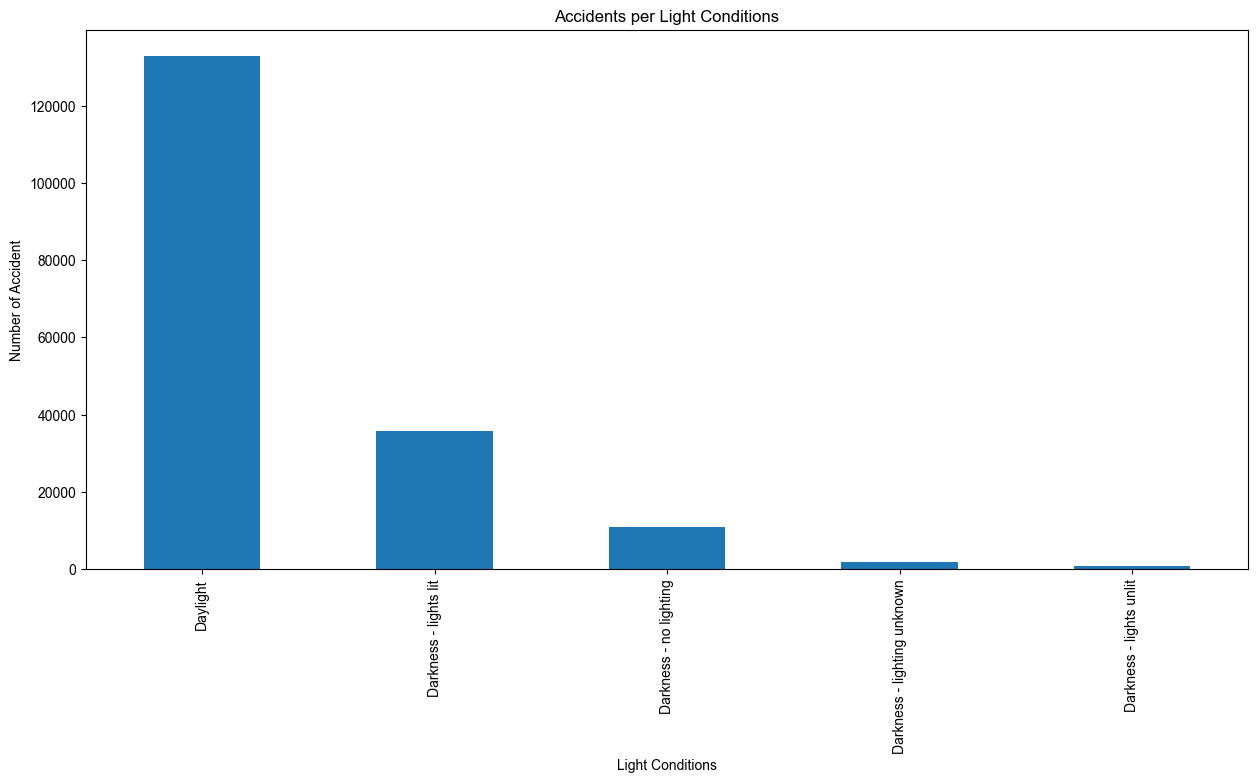

In [23]:
df_2019_light_conditions.plot(kind='bar')
plt.title('Accidents per Light Conditions')
plt.xlabel('Light Conditions')
plt.ylabel('Number of Accident')
sns.set_theme(style="darkgrid")
plt.gcf().set_size_inches(15, 7)
plt.show()

<h3 style= 'color:Green;' > INSIGHT NO.1 :  Daylight contribute to 132% of the total accidents from year 2019.</h3>

<h3>How many accidents occurred in each Accident Severity category?</h3>

In [24]:
accident_severity = accident['Accident_Severity'].value_counts()
accident_severity

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

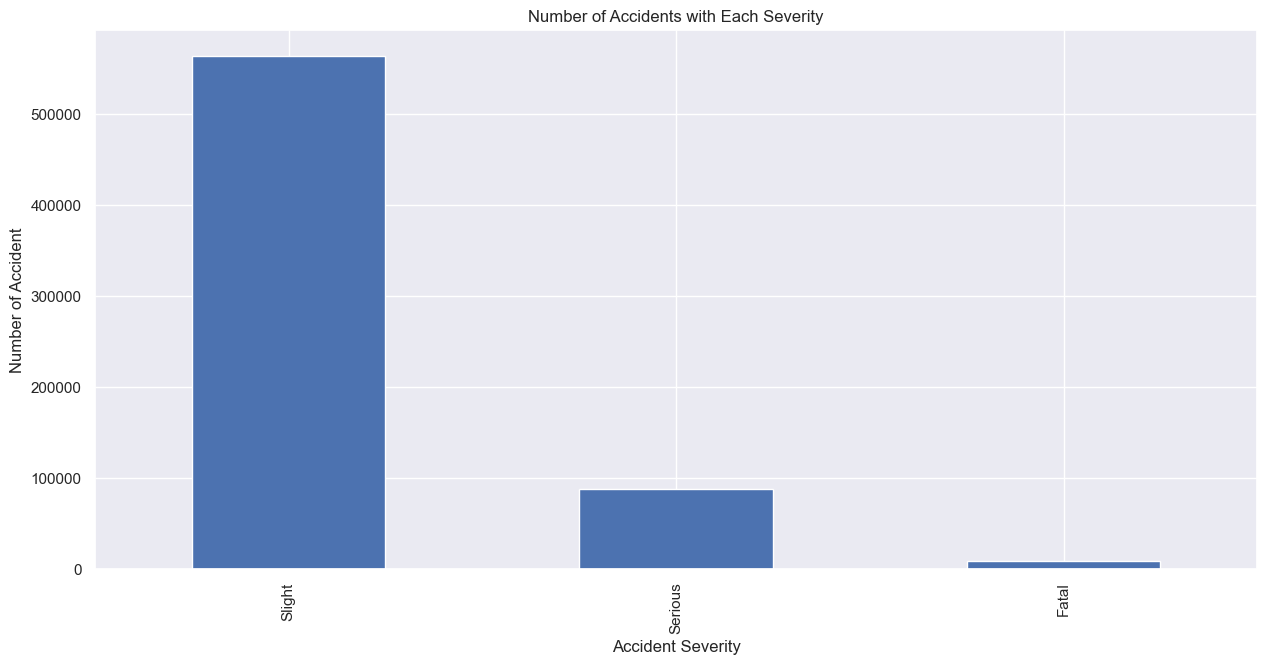

In [25]:
accident_severity.plot(kind='bar')
plt.title('Number of Accidents with Each Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Number of Accident')
sns.set_theme(style="darkgrid")
plt.gcf().set_size_inches(15, 7)
plt.show()

<h3 style='color:Green;'> INSIGHT NO.2 :  There are 3 different types of accident in Accident Severity category. There are 563,801 Slight Incidents, 88,217 Serious incidents and 8,661 Fatal Incidents.</h3>

<h3> What is the average number of casualties per accident?</h3>

In [26]:
round(accident['Number_of_Casualties'].mean(), 2)

np.float64(1.36)

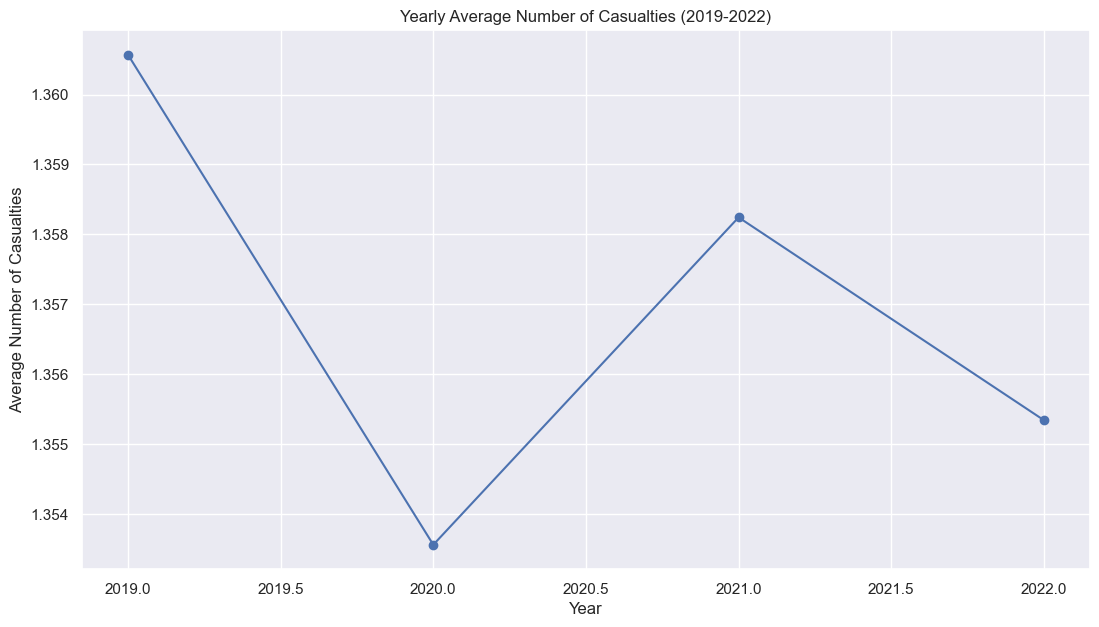

In [27]:
accident_yearly = accident.groupby('Year')['Number_of_Casualties'].mean()

plt.plot(accident_yearly.index, accident_yearly.values, marker='o')
plt.title("Yearly Average Number of Casualties (2019-2022)")
plt.xlabel("Year")
plt.ylabel("Average Number of Casualties")
plt.gcf().set_size_inches(13, 7)
plt.show()

<h3 style='color:Green;'> INSIGHT NO.3 :  Insight: On average, each accident results in 1.36 casualties, indicating that most accidents involve at least one injured person and occasionally more, highlighting the need for improved road safety measures.</h3>

<h3> What is the median number of vehicles involved in accidents?</h3>

In [28]:
accident['Number_of_Vehicles'].median()

np.float64(2.0)

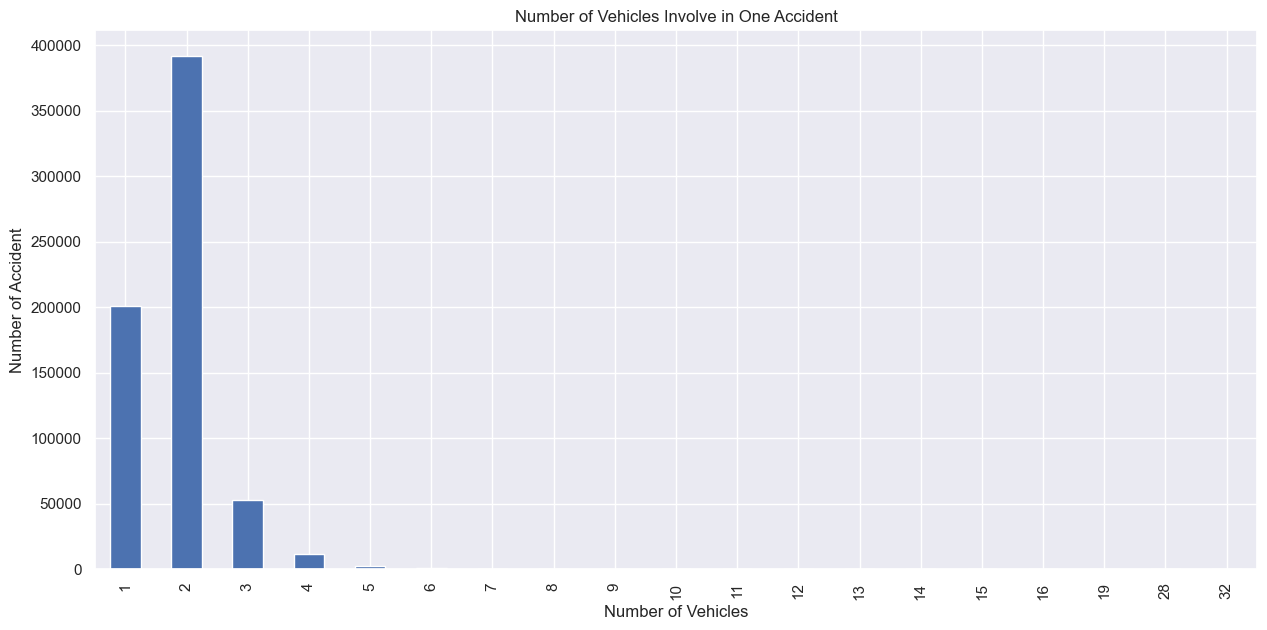

In [29]:
number_of_vehicles = accident['Number_of_Vehicles'].value_counts().sort_index()

number_of_vehicles.plot(kind='bar')
plt.title('Number of Vehicles Involve in One Accident')
plt.xlabel('Number of Vehicles')
plt.ylabel('Number of Accident')
sns.set_theme(style="darkgrid")
plt.gcf().set_size_inches(15, 7)
plt.show()

<h3 style='color:Green;'> INSIGHT NO.4 : The median number of vehicles per accident is 2.0, indicating that most accidents involve two vehicles, suggesting that collisions between two vehicles are the most common type of accident.</h3>

<h3>What is the highest number of vehicles involved in a single accident?</h3>

accident.describe()

In [30]:
accident['Number_of_Vehicles'].max()

np.int64(32)

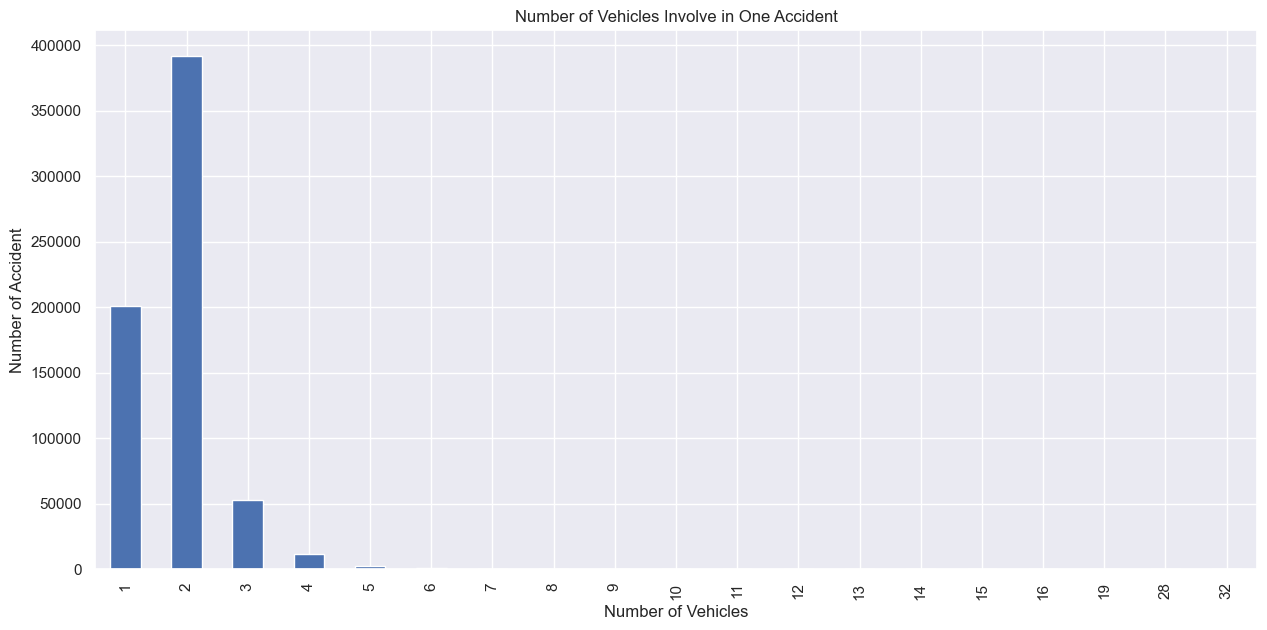

In [31]:
number_of_vehicles = accident['Number_of_Vehicles'].value_counts().sort_index()

number_of_vehicles.plot(kind='bar')
plt.title('Number of Vehicles Involve in One Accident')
plt.xlabel('Number of Vehicles')
plt.ylabel('Number of Accident')
sns.set_theme(style="darkgrid")
plt.gcf().set_size_inches(15, 7)
plt.show()

<h3 style='color:Green;'> INSIGHT NO.5 : A single accident involved a staggering 32 vehicles. This marks the highest number of vehicles involved in any single collision.</h3>

<h3>What is the most common weather condition during accidents</h3>

In [32]:
accident['Weather_Conditions'].describe()

count                 660679
unique                     9
top       Fine no high winds
freq                  520885
Name: Weather_Conditions, dtype: object

In [33]:
accident['Weather_Conditions'].mode()[0]


'Fine no high winds'

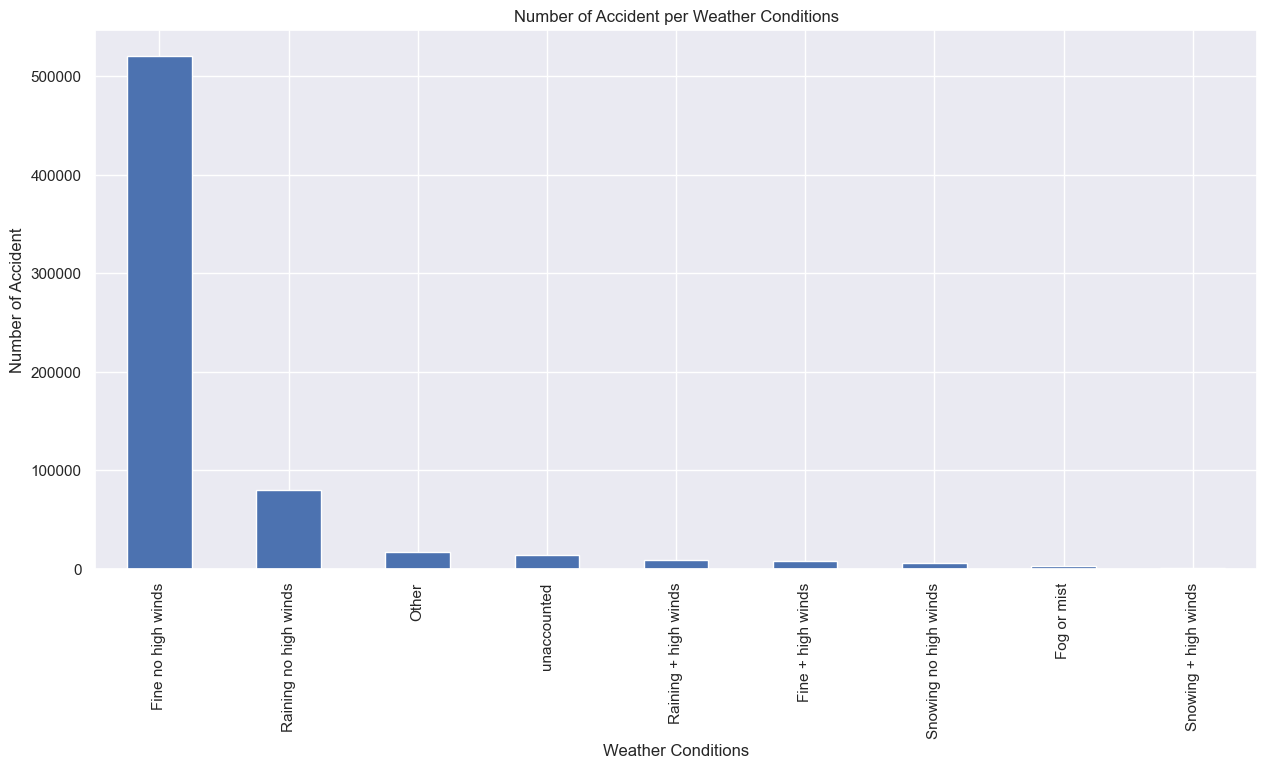

In [34]:
weather_conditions = accident['Weather_Conditions'].value_counts()

weather_conditions.plot(kind='bar')
plt.title('Number of Accident per Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accident')
sns.set_theme(style="darkgrid")
plt.gcf().set_size_inches(15, 7)
plt.show()

<h3 style='color:Green;'> INSIGHT NO.6 : Most accident happen in no high winds weather condition, showing the fair weather does not always guarantee safe driving.</h3>

<h3>What is the distribution of accident severity</h3>

In [35]:
ave_accident_severity = round(accident['Accident_Severity'].value_counts(normalize = True)*100,2)

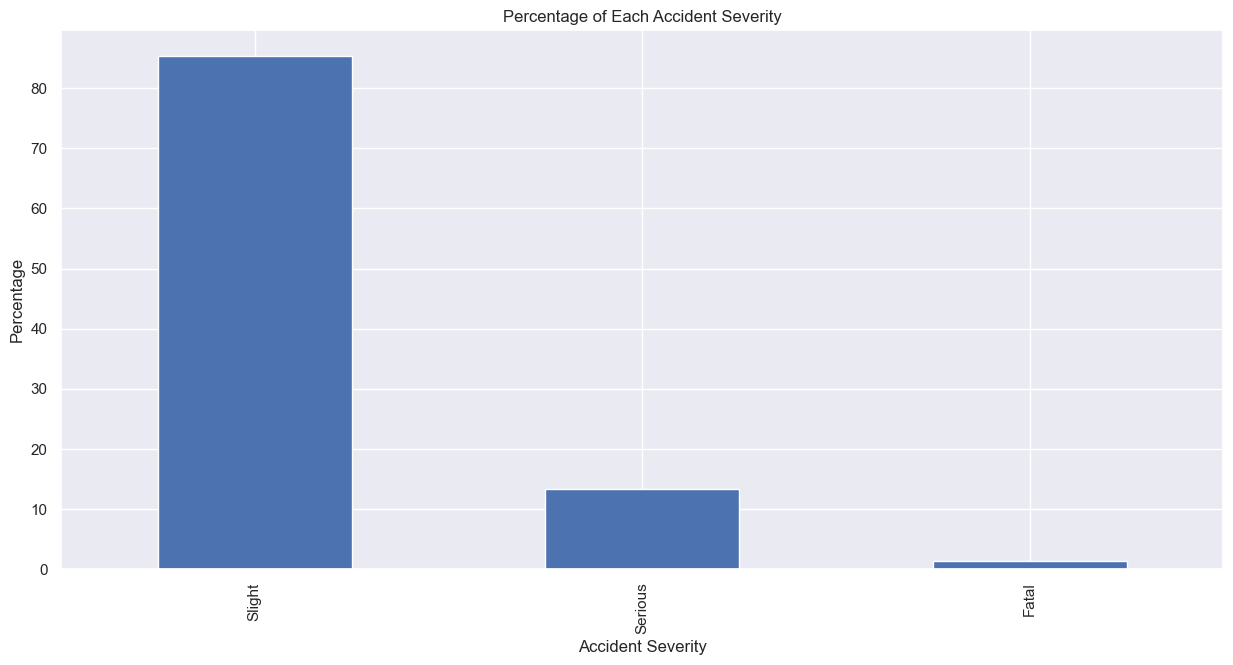

In [36]:
ave_accident_severity.plot(kind='bar')
plt.title('Percentage of Each Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Percentage')
sns.set_theme(style="darkgrid")
plt.gcf().set_size_inches(15, 7)
plt.show()

<h3 style='color:Green;'> INSIGHT NO.7 : Only 1.31% of accident are fatal, while 14.35% result in serious injuries and 85.34% are classified as minor injuries. This distributionhighlights that while most accidents cause only slight harm, there are still a significant likelihood of high risk accidents requiring serious attention to roas safety.</h3>

<h2> BIVARIATE ANALYSIS</h2>

<h3>How many accident happen in Saturday with the light conditions of Daylight where most accident happens?</h3>

In [37]:
accident[(accident['DayOfWeek'] == 5) & (accident['Light_Conditions'] == 'Daylight')].value_counts().sum()

np.int64(78141)

In [38]:
accident.value_counts().sum()

np.int64(660679)

In [39]:
percentage = np.round((78141 / 660679) * 100, 2)

print(f'{percentage}%')

11.83%


In [40]:
light_conditions = accident[accident['Light_Conditions'] == 'Daylight']

In [41]:
lc_days = light_conditions['DayOfWeek'].value_counts().sort_index()
lc_days.index = lc_days.index.map(day_map)

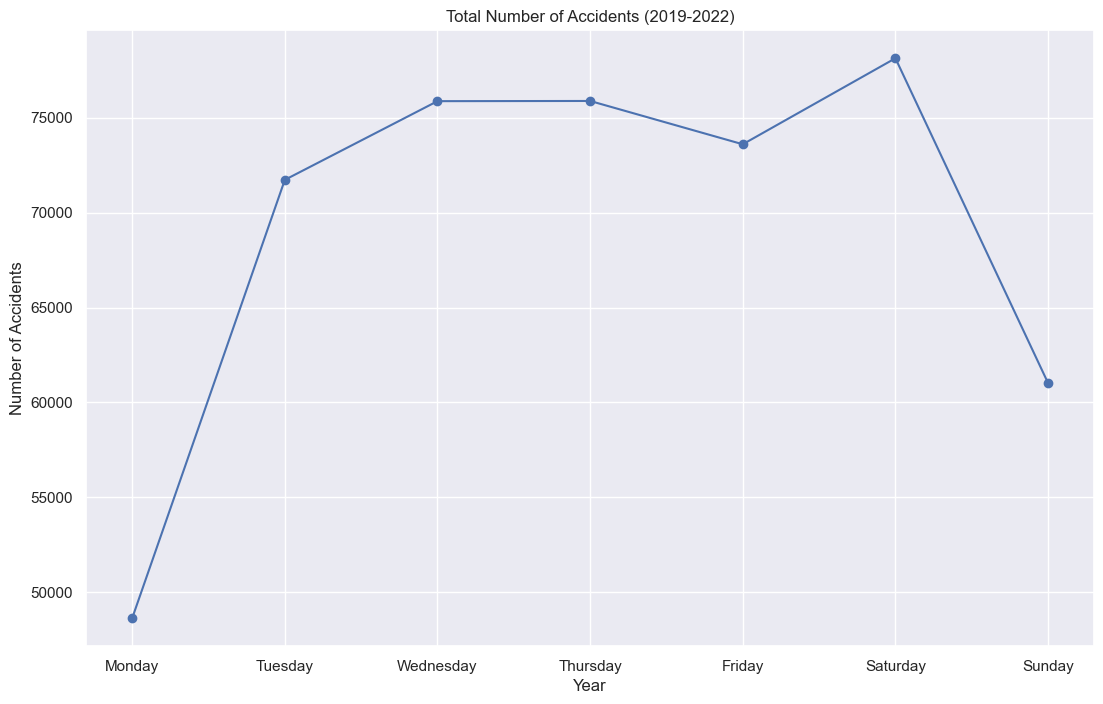

In [42]:
plt.plot(lc_days.index, lc_days.values, marker='o')
plt.title("Total Number of Accidents (2019-2022)")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.gcf().set_size_inches(13, 8)
plt.show()

<h3 style='color:Green;'> INSIGHT NO.8 : On Saturdays, a total of 78,141 accidents occur under daylight conditions, accounting for 11.83% of all reported accidents. This indicates that a significant number of accidents take place on this day, possibly due to increased traffic activity, weekend travel, or other contributing factors. Understanding the locations where these accidents are most frequent could help in implementing better road safety measures and awareness campaigns to reduce the risk.</h3>

<h3>Is there correlation between Number of  Vehicles and Number of Casualties?</h3>

In [43]:
accident['Number_of_Vehicles'].corr(accident['Number_of_Casualties'])

np.float64(0.22888886126927557)

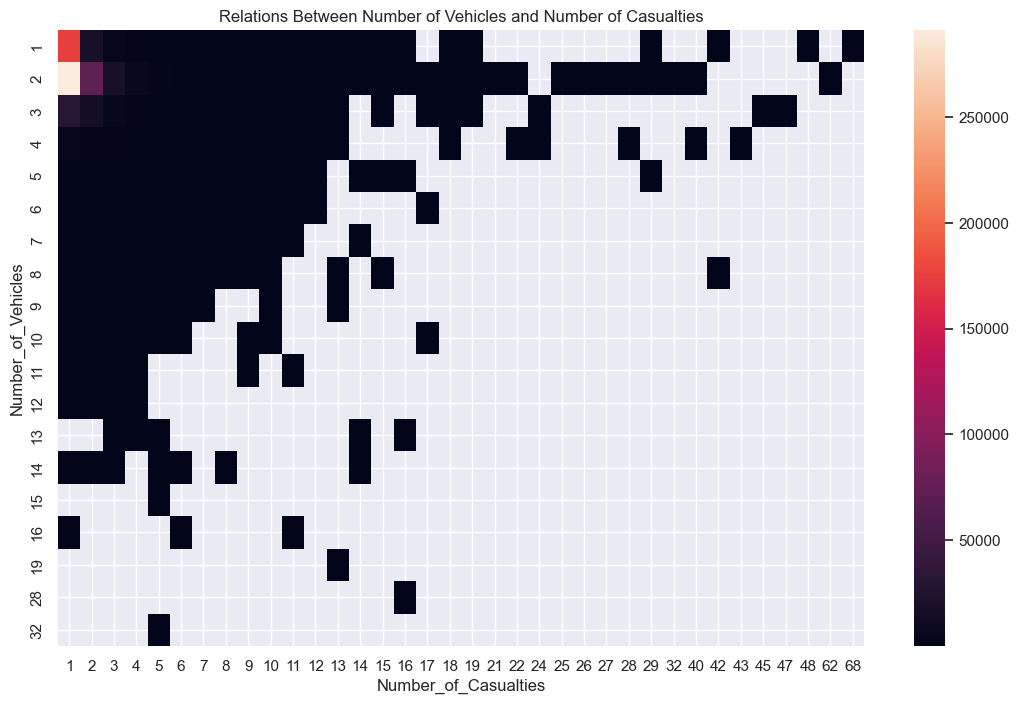

In [44]:
type_dayofweek_vh = accident.groupby(['Number_of_Vehicles', 'Number_of_Casualties']).size().unstack()
plt.title("Relations Between Number of Vehicles and Number of Casualties")
plt.gcf().set_size_inches(13, 8)
sns.heatmap(type_dayofweek_vh)
plt.show()

<h3 style='color:Green;'> INSIGHT NO.9 : The analysis reveals a correlation between the number of vehicles involved and the number of casualties, with a p-value of 0.23. While this suggests a relationship, the relatively high p-value indicates limited statistical significance. Further investigation, considering factors like road conditions and vehicle types, could provide deeper insights and improve safety measures.</h3>

<h3>What is the average number of casualties in accidents that happen in Rual and Urban area?</h3>

In [45]:
urban_acc = accident[accident['Urban_or_Rural_Area'] == 'Urban']

In [46]:
np.round(urban_acc['Number_of_Casualties'].mean(), 2)

np.float64(1.29)

In [47]:
rural_acc = accident[accident['Urban_or_Rural_Area'] == 'Rural']

In [48]:
np.round(rural_acc['Number_of_Casualties'].mean(), 2)

np.float64(1.48)

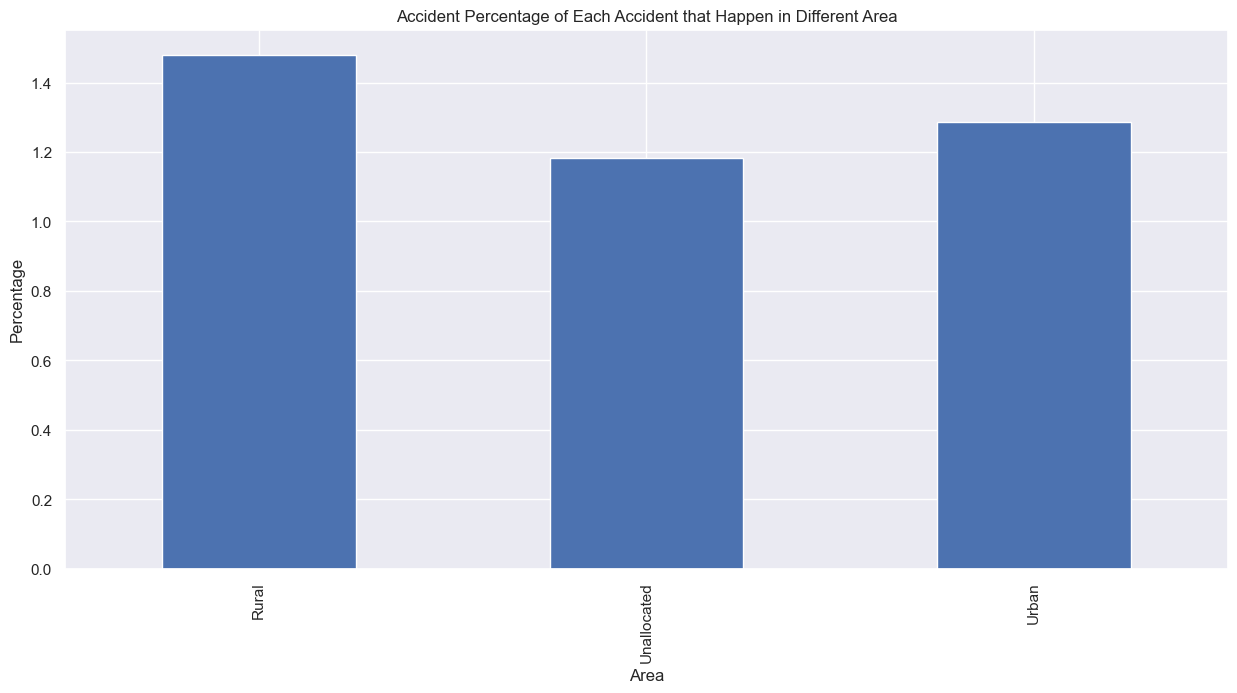

In [49]:
ave_Urban_or_Rural_Area = accident.groupby('Urban_or_Rural_Area')['Number_of_Casualties'].mean()

ave_Urban_or_Rural_Area.plot(kind='bar')
plt.title('Accident Percentage of Each Accident that Happen in Different Area')
plt.xlabel('Area')
plt.ylabel('Percentage')
sns.set_theme(style="darkgrid")
plt.gcf().set_size_inches(15, 7)
plt.show()

<h3 style='color:Green;'> INSIGHT NO.10 : The analysis reveals that accidents in rural areas have a higher average number of casualties (1.48) compared to urban areas (1.29). This suggests that rural accidents may be more severe, potentially due to higher speed limits, limited access to immediate medical assistance, or road conditions. Understanding these factors can help in developing targeted safety measures to reduce casualties in rural areas.</h3>

<h3>Light conditon that got the highest accident which resulted to fatal severity.</h3>

In [50]:
fatal = accident[accident['Accident_Severity'] == 'Fatal']
fatal.value_counts().sum()

np.int64(8661)

In [51]:
fatal['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       5076
Darkness - lights lit          1860
Darkness - no lighting         1612
Darkness - lighting unknown      68
Darkness - lights unlit          45
Name: count, dtype: int64

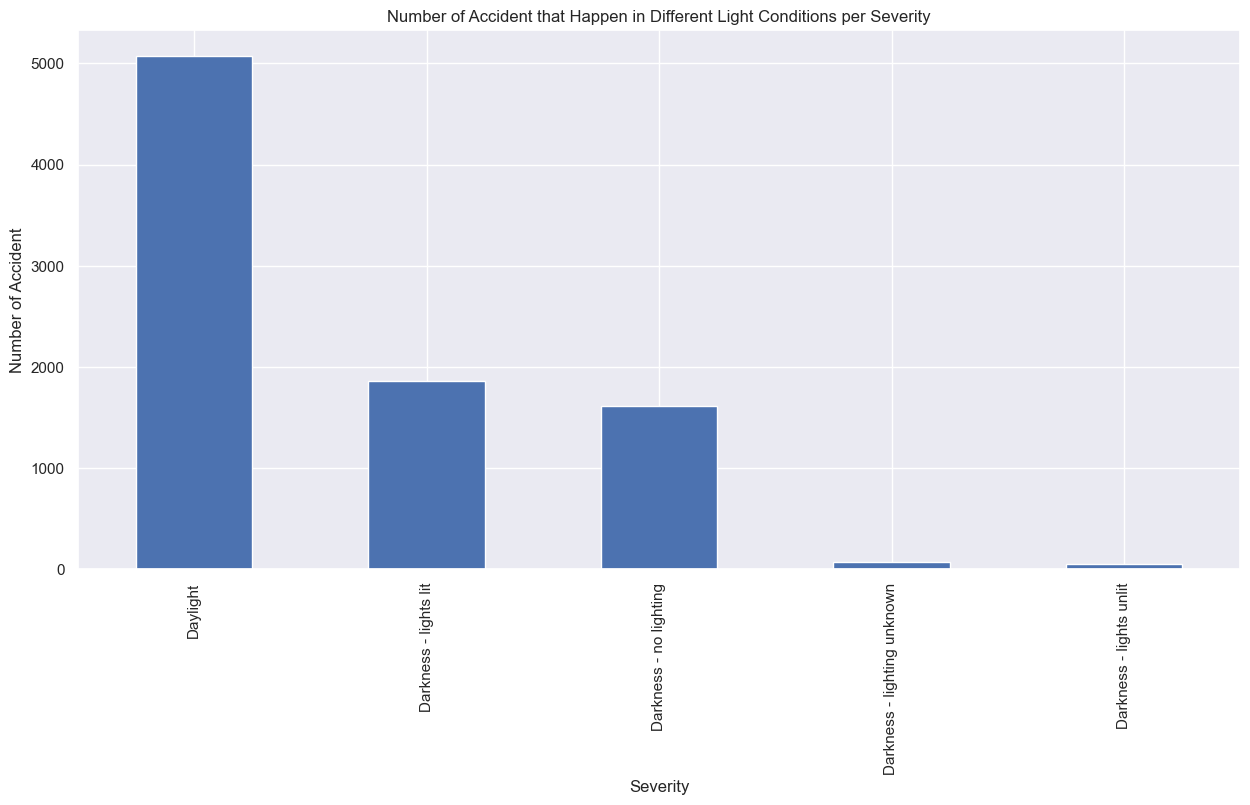

In [52]:
f_light = fatal['Light_Conditions'].value_counts()

f_light.plot(kind='bar')
plt.title('Number of Accident that Happen in Different Light Conditions per Severity')
plt.xlabel('Severity')
plt.ylabel('Number of Accident')
sns.set_theme(style="darkgrid")
plt.gcf().set_size_inches(15, 7)
plt.show()

<h3 style='color:Green;'> INSIGHT NO.11 : The analysis reveals that the majority of fatal accidents occur under daylight conditions, with 5,076 incidents, accounting for 58.61% of the total 8,661 fatal accidents. This suggests that despite good visibility, other factors such as traffic density, driver behavior, or road conditions may contribute to accident severity. Further investigation into these factors could help develop targeted safety measures to reduce fatal accidents.</h3>

<h3>Question : What is the average number of casualties during November and a weather conditions with fine and no high winds.</h3>

In [53]:
accident['Month'].value_counts()

Month
11    60424
10    59580
7     57445
6     56481
9     56455
5     56352
3     54086
8     53913
1     52872
12    51836
4     51744
2     49491
Name: count, dtype: int64

In [54]:
accident['Weather_Conditions'].value_counts()

Weather_Conditions
Fine no high winds       520885
Raining no high winds     79696
Other                     17150
unaccounted               14128
Raining + high winds       9615
Fine + high winds          8554
Snowing no high winds      6238
Fog or mist                3528
Snowing + high winds        885
Name: count, dtype: int64

In [55]:
nov_rate = accident[(accident['Month'] == 11) & (accident['Weather_Conditions'] == 'Fine no high winds')]['Number_of_Casualties'].mean()

np.round(nov_rate, 2)


np.float64(1.34)

In [56]:
nov_acc = accident[accident['Month'] == 11]

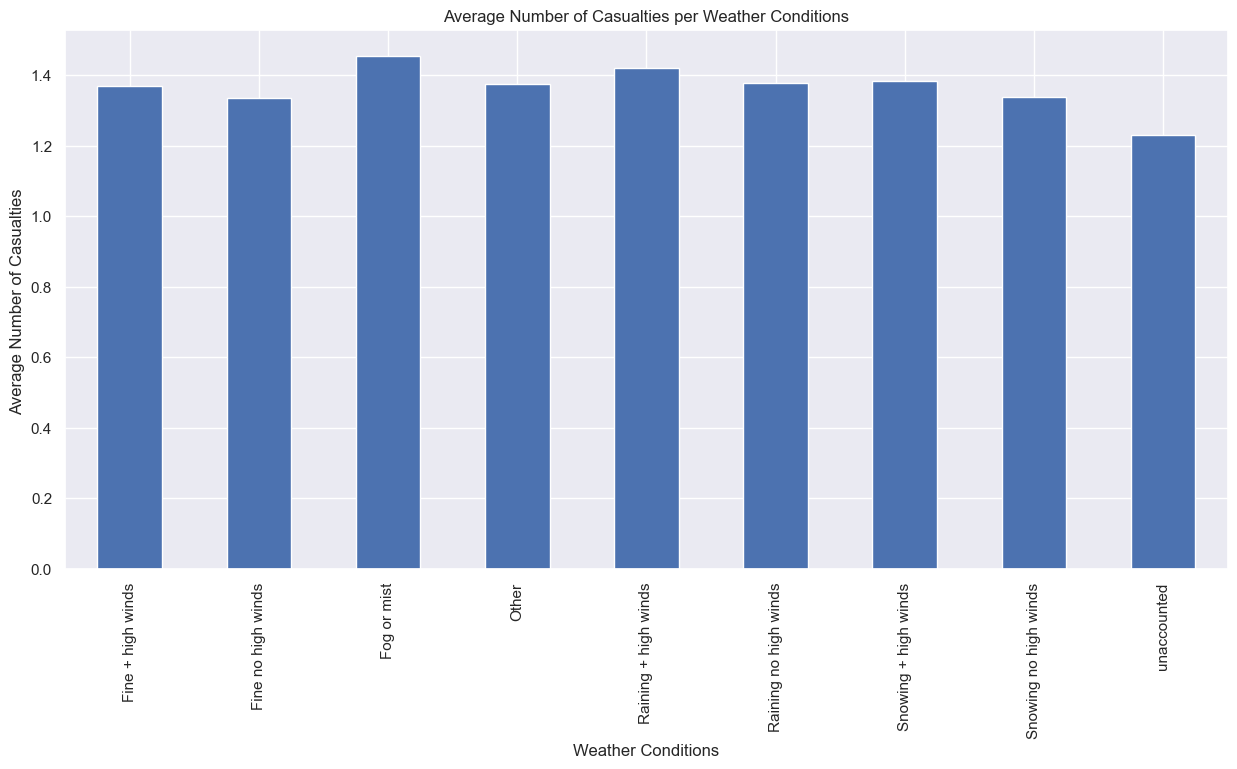

In [68]:
ave_fine_no_wide_acc = nov_acc.groupby('Weather_Conditions')['Number_of_Casualties'].mean()

ave_fine_no_wide_acc.plot(kind='bar')
plt.title('Average Number of Casualties per Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Average Number of Casualties ')
sns.set_theme(style="darkgrid")
plt.gcf().set_size_inches(15, 7)
plt.show()

<h3 style='color:Green;'> INSIGHT NO.12 : The analysis indicates that the average number of casualties in accidents occurring in November under fine weather conditions with no wind is 1.34. This suggests that even in seemingly ideal weather conditions, accidents still result in casualties, potentially due to other contributing factors such as traffic volume, road conditions, or driver behavior. Further analysis could help identify specific risks and improve safety measures.</h3>

<h3>The number of accident that happens in slip road and wet road type.</h3>

In [58]:
accident['Road_Type'].value_counts()

Road_Type
Single carriageway    492143
Dual carriageway       99424
Roundabout             43992
One way street         13559
Slip road               7041
unaccounted             4520
Name: count, dtype: int64

In [59]:
accident['Road_Surface_Conditions'].value_counts()

Road_Surface_Conditions
Dry                     447821
Wet or damp             186708
Frost or ice             18517
Snow                      5890
Flood over 3cm. deep      1017
unaccounted                726
Name: count, dtype: int64

In [60]:
accident[(accident['Road_Type'] == 'Slip road') & (accident['Road_Surface_Conditions'] == 'Wet or damp')].value_counts().sum()

np.int64(2074)

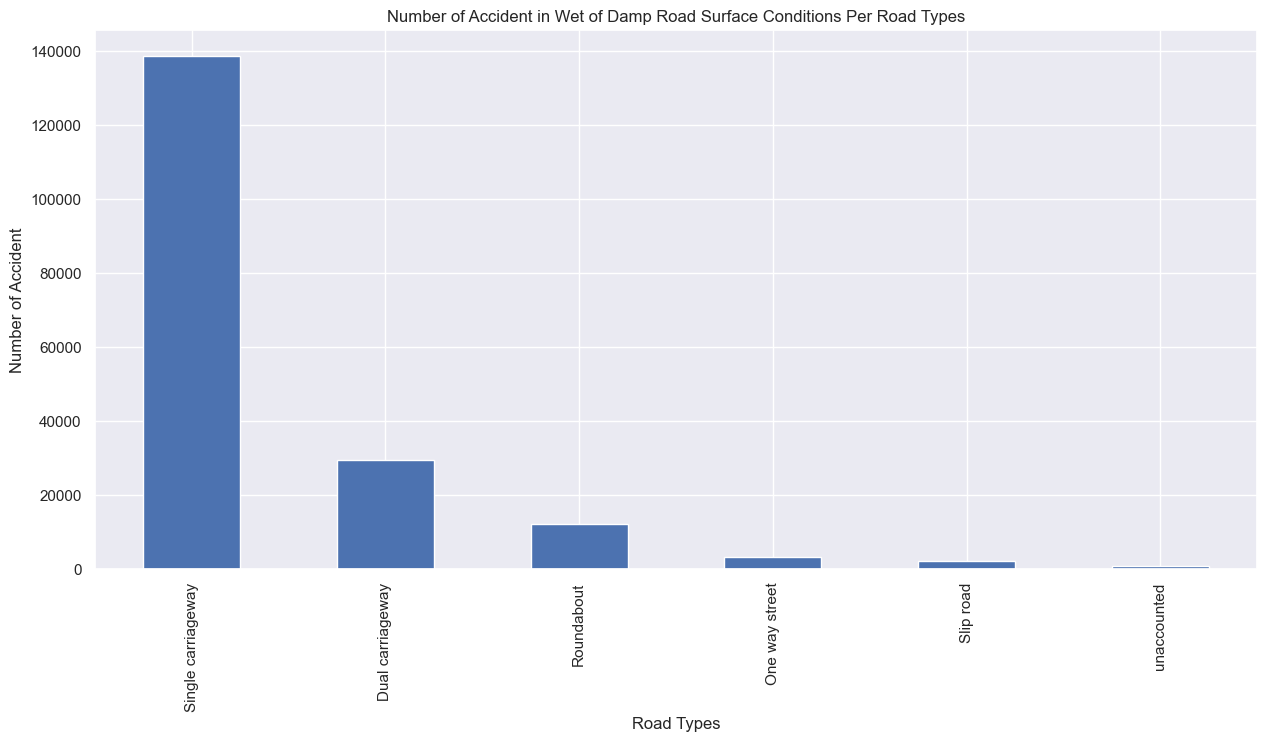

In [67]:
wet_dump = accident[accident['Road_Surface_Conditions'] == 'Wet or damp']
wet_road_type = wet_dump['Road_Type'].value_counts()

wet_road_type.plot(kind='bar')
plt.title('Number of Accident in Wet of Damp Road Surface Conditions Per Road Types')
plt.xlabel('Road Types')
plt.ylabel('Number of Accident')
sns.set_theme(style="darkgrid")
plt.gcf().set_size_inches(15, 7)
plt.show()

<h3 style='color:Green;'> INSIGHT NO.13 : The analysis reveals that accidents occurring on slip roads with a wet road surface account for only 0.31% of all accidents, totaling 2,074 incidents in past years. This indicates that while such conditions may pose risks, they contribute to a relatively small proportion of overall accidents. Investigating other high-risk road conditions could help prioritize safety improvements more effectively.</h3>

<h3>The average number of vehicles involve while car is the is the recorded vehicle type.</h3>

In [69]:
accident['Vehicle_Type'].value_counts()

Vehicle_Type
Car                                      497992
Van / Goods 3.5 tonnes mgw or under       34160
Bus or coach (17 or more pass seats)      25878
Motorcycle over 500cc                     25657
Goods 7.5 tonnes mgw and over             17307
Motorcycle 125cc and under                15269
Taxi/Private hire car                     13294
Motorcycle over 125cc and up to 500cc      7656
Motorcycle 50cc and under                  7603
Goods over 3.5t. and under 7.5t            6096
Other vehicle                              5637
Minibus (8 - 16 passenger seats)           1976
Agricultural vehicle                       1947
Pedal cycle                                 197
Data missing or out of range                  6
Ridden horse                                  4
Name: count, dtype: int64

In [71]:
ave = accident[accident['Vehicle_Type'] == 'Car']['Number_of_Vehicles'].mean()

np.round(ave, 2)

np.float64(1.83)

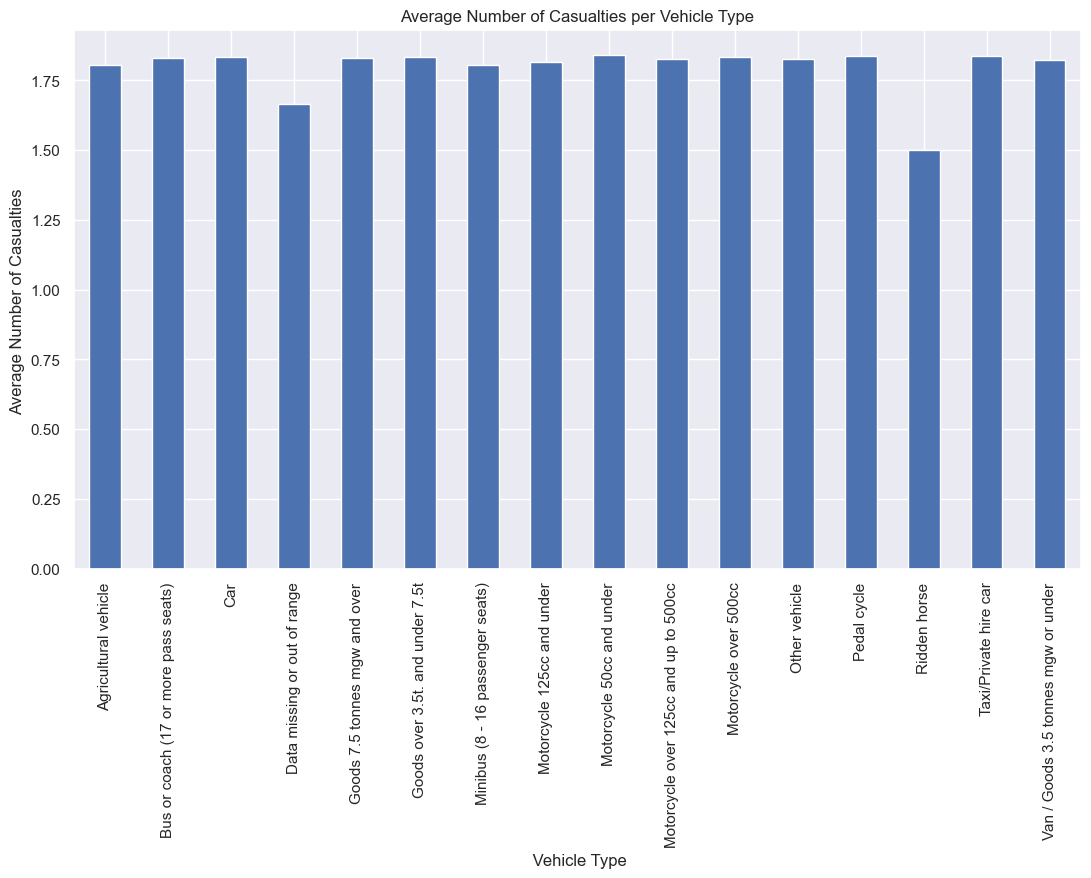

In [94]:
ave_vehivle_type = accident.groupby('Vehicle_Type')['Number_of_Vehicles'].mean()

ave_vehivle_type.plot(kind='bar')
plt.title('Average Number of Casualties per Vehicle Type')
plt.xlabel(' Vehicle Type')
plt.ylabel('Average Number of Casualties ')
sns.set_theme(style="darkgrid")
plt.gcf().set_size_inches(13, 7)
plt.show()

<h3 style='color:Green;'> INSIGHT NO.14 : The analysis shows that the average number of vehicles involved in accidents specifically involving cars is 1.83. This suggests that most car accidents typically involve multiple vehicles rather than single-vehicle incidents. Further analysis could explore factors such as collision types, road conditions, and driver behavior to better understand accident dynamics.</h3>

<h2>MULTIVARIATE ANALYSIS</h2>

<h3>Accident Severity Analysis in urban or rural area by light condition.</h3>

In [84]:
light_condition = accident.groupby(['Urban_or_Rural_Area','Accident_Severity'], observed=True)['Light_Conditions']
light_condition.value_counts().unstack()

Light_Conditions                       Darkness - lighting unknown  \
Urban_or_Rural_Area Accident_Severity                                
Rural               Fatal                                       41   
                    Serious                                    344   
                    Slight                                    2082   
Unallocated         Fatal                                        0   
                    Serious                                      0   
                    Slight                                       0   
Urban               Fatal                                       27   
                    Serious                                    450   
                    Slight                                    3540   

Light_Conditions                       Darkness - lights lit  \
Urban_or_Rural_Area Accident_Severity                          
Rural               Fatal                                578   
                    Serious                             3827   
                    Slight                             20290   
Unallocated         Fatal                                  0   
                    Serious                                0   
                    Slight                                 2   
Urban               Fatal                               1282   
                    Serious                            15303   
                    Slight                             88053   

Light_Conditions                       Darkness - lights unlit  \
Urban_or_Rural_Area Accident_Severity                            
Rural               Fatal                                   29   
                    Serious                                150   
                    Slight                                 782   
Unallocated         Fatal                                    0   
                    Serious                                  0   
                    Slight                                   0   
Urban               Fatal                                   16   
                    Serious                                210   
                    Slight                                1356   

Light_Conditions                       Darkness - no lighting  Daylight  
Urban_or_Rural_Area Accident_Severity                                    
Rural               Fatal                                1569      3384  
                    Serious                              6861     26130  
                    Slight                              27087    145836  
Unallocated         Fatal                                   0         0  
                    Serious                                 0         1  
                    Slight                                  0         8  
Urban               Fatal                                  43      1692  
                    Serious                               313     34628  
                    Slight                               1564    273201

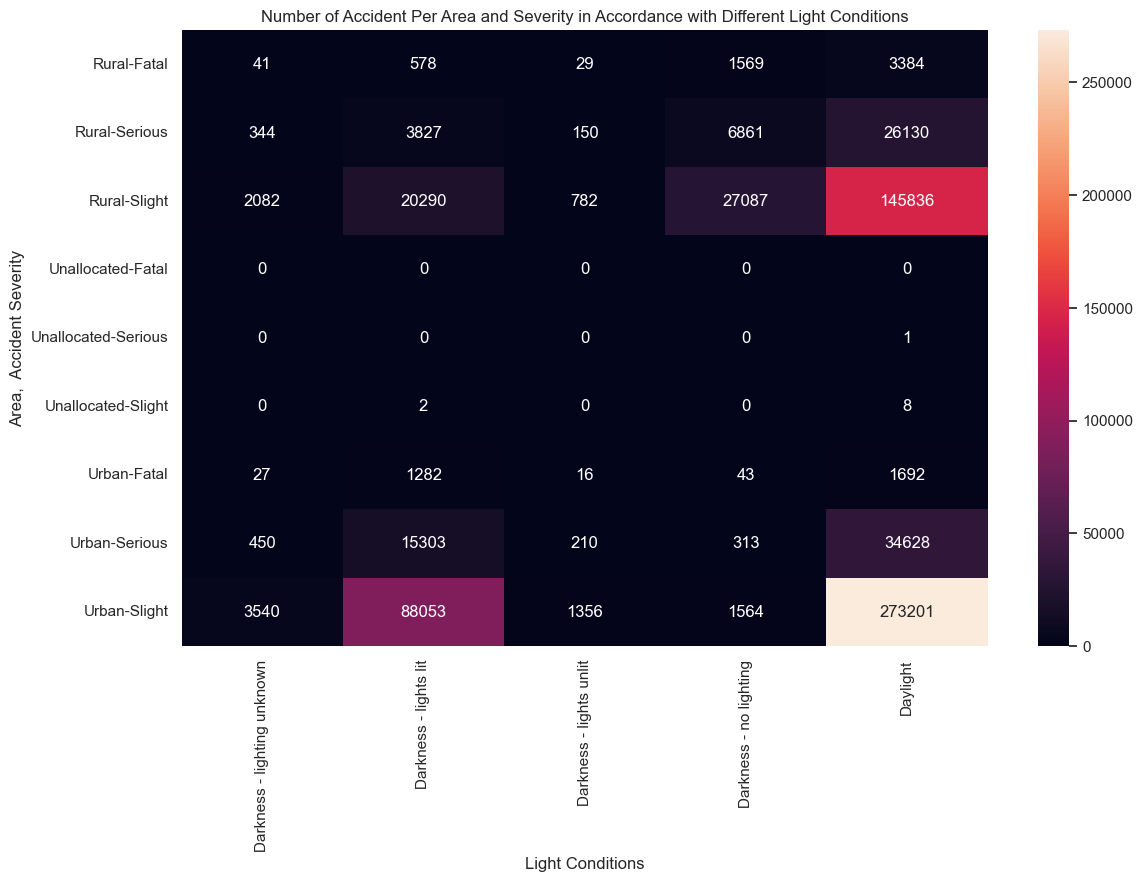

In [93]:
area_severity_lightcon = accident.groupby(['Urban_or_Rural_Area', 'Accident_Severity', 'Light_Conditions']).size().unstack()

sns.heatmap(area_severity_lightcon, annot=True, fmt='g')

plt.title("Number of Accident Per Area and Severity in Accordance with Different Light Conditions")
plt.xlabel("Light Conditions")
plt.ylabel("Area,  Accident Severity")
plt.gcf().set_size_inches(13, 8)
plt.show()

<h3 style='color:Green;'> INSIGHT NO.15 : The highest number of accidents happen in urban areas under daylight conditions, with 273,201 slight accidents, 34,628 serious accidents, and 1,692 fatal accidents. This suggests that high traffic density and increased road activity during the day contribute to a larger number of accidents, despite good visibility.</h3>

<h3 style='color:Green;'> INSIGHT NO.16 : While urban areas have more accidents overall, rural areas show a higher number of fatal accidents relative to the total number of accidents. For example, under daylight conditions, rural areas recorded 3,384 fatal accidents, compared to 1,692 in urban areas. This could be due to higher vehicle speeds, limited medical response times, or road infrastructure differences.</h3>

<h3 style='color:Green;'> INSIGHT NO.17 : In both urban and rural areas, a large number of accidents occur under "Darkness - lights lit" conditions. Urban areas recorded 88,053 slight accidents, 15,303 serious accidents, and 1,282 fatal accidents under these conditions. This suggests that while street lighting improves visibility, other risk factors such as reduced reaction time, driver fatigue, and speeding at night contribute to accident frequency.</h3>

<h3>Accident Severity Analysis in urban or rural area by Road Surface Condition.</h3>

In [88]:
road_surface = accident.groupby(['Year','Accident_Severity'], observed=True)['Road_Surface_Conditions']
road_surface.value_counts().unstack()

Road_Surface_Conditions     Dry  Flood over 3cm. deep  Frost or ice  Snow  \
Year Accident_Severity                                                      
2019 Fatal                 1850                     4            31     3   
     Serious              17181                    54           284    51   
     Slight              106317                   254          2254   480   
2020 Fatal                 1540                     6            47     5   
     Serious              15733                    45           463    71   
     Slight               96233                   280          3360   522   
2021 Fatal                 1333                    11            61     7   
     Serious              15318                    33           557   180   
     Slight               93632                   216          4647  1622   
2022 Fatal                 1065                     2            54    20   
     Serious              13406                    20           703   263   
     Slight               84213                    92          6056  2666   

Road_Surface_Conditions  Wet or damp  unaccounted  
Year Accident_Severity                             
2019 Fatal                       826            0  
     Serious                    6734           18  
     Slight                    45593          181  
2020 Fatal                       742            1  
     Serious                    6776           33  
     Slight                    44558          176  
2021 Fatal                       645            0  
     Serious                    5902            7  
     Slight                    39238          145  
2022 Fatal                       407            1  
     Serious                    4373           12  
     Slight                    30914          152

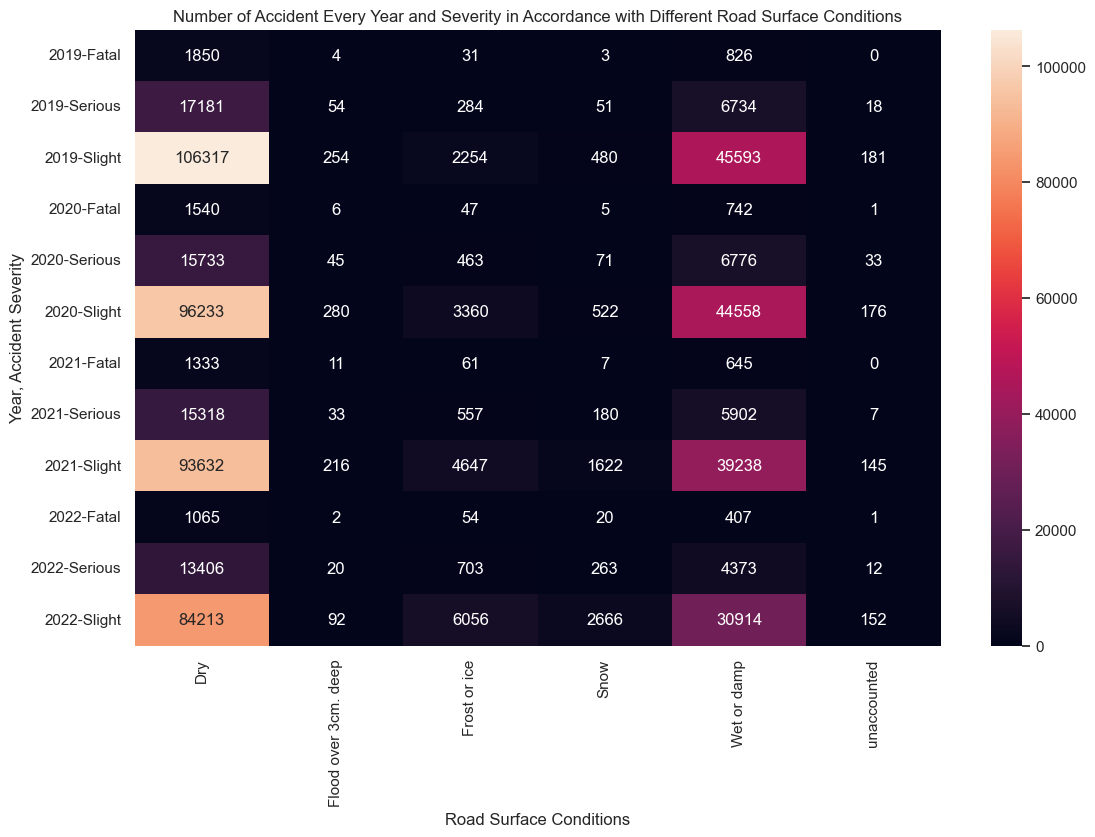

In [92]:
year_severity_roadcon = accident.groupby(['Year', 'Accident_Severity', 'Road_Surface_Conditions']).size().unstack()

sns.heatmap(year_severity_roadcon, annot=True, fmt='g')

plt.title("Number of Accident Every Year and Severity in Accordance with Different Road Surface Conditions")
plt.xlabel("Road Surface Conditions")
plt.ylabel("Year, Accident Severity")
plt.gcf().set_size_inches(13, 8)
plt.show()

<h3 style='color:Green;'> INSIGHT NO.18 : There is a noticeable decline in accidents from 2019 to 2022 across all severity levels. For example, serious accidents on dry roads decreased from 17,181 in 2019 to 13,406 in 2022, and slight accidents dropped from 106,317 to 84,213. This suggests that road safety measures or reduced traffic volume might have contributed to fewer accidents.</h3>

<h3 style='color:Green;'> INSIGHT NO.19 : Wet or damp road conditions consistently account for a significant portion of accidents. In 2019, there were 45,593 slight accidents and 6,734 serious accidents on wet roads, and while these numbers decreased in later years, they remain consistently high. This highlights the need for improved road drainage and driver awareness during wet conditions.</h3>

<h3 style='color:Green;'> INSIGHT NO.20 : Fatal accidents have decreased across all road conditions, from 1,850 in 2019 to 1,065 in 2022. This could be attributed to improved emergency response, better vehicle safety features, or increased road safety awareness. However, continuous efforts are needed to further reduce fatalities, especially in hazardous conditions like snow and ice.</h3>